# **Tamaño de las Bodegas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

pd.options.display.float_format = '{:.2f}'.format

## **1.1 Caso Actual**

In [2]:
# Ventas categorizadas y asignación resultante
bdd_ventas = pd.read_excel("BDD_Bodegas_Categorizada.xlsx")
bdd_asignaciones = pd.read_excel("Datos_Aloc_3_bodegas.xlsx")
bdd_asignaciones['Bodega Asignada'] = bdd_asignaciones['Bodega Asignada'].replace({1: 8, 3: 1, 2: 4})
bdd_ventas['Fecha'] = pd.to_datetime(bdd_ventas['Fecha'])
bdd_ventas['Semana'] = bdd_ventas['Fecha'].dt.strftime('%U')
bdd_ventas['Año'] = bdd_ventas['Fecha'].dt.year
bdd_ventas['Año-Sem'] = bdd_ventas['Año'].astype(str) + "-" + bdd_ventas['Semana'].astype(str)

# Comunas
bdd_comunas = pd.read_excel("BDD_Bodegas.xlsx", sheet_name=3)

In [3]:
bdd_asignaciones_intercambiadas = bdd_asignaciones[['Unnamed: 0', 'Bodega Asignada', 'Tiempo']]
bdd_asignaciones = bdd_asignaciones[['Unnamed: 0', 'Bodega Asignada', 'Tiempo']]

In [4]:
# Agrupación de ventas por cliente 
bdd_ventas_agrupadas = bdd_ventas.groupby(['ID Cliente', 'Año-Sem']).agg({"Cantidad": "sum", "Comuna Despacho": "first", 'ID Bodega Despacho': 'first', 'Categoria': 'first'}).reset_index()
bdd_ventas_agrupadas = bdd_ventas_agrupadas.merge(bdd_comunas, left_on='Comuna Despacho', right_on='Comuna')
bdd_ventas_agrupadas['Cantidad'] = bdd_ventas_agrupadas['Cantidad'].apply(lambda x: 0.01 if x == 0 else x)

# Juntamos asginaciones con demandas tanto de la bdd historica como de la proyeccion
bdd_historica = bdd_ventas_agrupadas.merge(bdd_asignaciones, left_on = "ID Cliente", right_on = "Unnamed: 0")

# Resultados
df_actual = bdd_historica.groupby(['Bodega Asignada', 'Año-Sem'])['Cantidad'].sum().reset_index()
promedio_por_bodega_1 = df_actual.groupby('Bodega Asignada')['Cantidad'].mean()

Promedios por bodega actual:

In [5]:
promedio_por_bodega_1

Bodega Asignada
1    3049.36
4   11864.77
8    5129.39
Name: Cantidad, dtype: float64

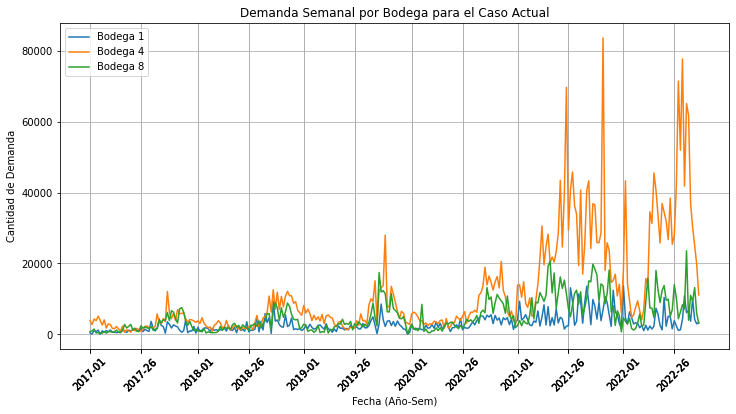

In [6]:
# Supongamos que tienes un DataFrame llamado 'df' con la estructura proporcionada
df = df_actual

# Crear un gráfico con líneas separadas para cada bodega
plt.figure(figsize=(12, 6))
for bodega, data in df.groupby('Bodega Asignada'):
    plt.plot(data['Año-Sem'], data['Cantidad'], label=f'Bodega {bodega}')

plt.xlabel('Fecha (Año-Sem)')
plt.ylabel('Cantidad de Demanda')
plt.title('Demanda Semanal por Bodega para el Caso Actual')
plt.legend()

# Especifica las fechas que deseas mostrar en el eje x
fechas_mostradas = ["2017-01", "2017-26", "2018-01", "2018-26", "2019-01", "2019-26", "2020-01", "2020-26", "2021-01", "2021-26", "2022-01", "2022-26"]

# Filtra el DataFrame para mostrar solo las fechas especificadas
df_mostrado = df[df['Año-Sem'].isin(fechas_mostradas)]

# Establece las marcas (ticks) en el eje x
plt.xticks(df_mostrado['Año-Sem'], rotation=45)

plt.grid(True)
plt.show()

## **1.2 Caso Futuro**

In [7]:
# Proyecciones categorizadas y asignación resultante
bdd_proyecciones = pd.read_excel("BDD_Bodegas_Categorizada_proy.xlsx")
bdd_asignaciones_proy = pd.read_excel("Datos_Aloc_proy_3_bodegas.xlsx")
bdd_asignaciones_proy['Bodega Asignada'] = bdd_asignaciones_proy['Bodega Asignada'].replace({1: 8, 3: 1, 2: 4})

# Año y semana de las proyecciones
bdd_proyecciones['Año'] = bdd_proyecciones['Fecha'].dt.year
bdd_proyecciones['Semana'] = bdd_proyecciones['Fecha'].dt.strftime('%U')
bdd_proyecciones['Año-Sem'] = bdd_proyecciones['Año'].astype(str) + "-" + bdd_proyecciones['Semana'].astype(str)

In [8]:
bdd_asignaciones_proy_intercambiadas = bdd_asignaciones_proy[['Unnamed: 0', 'Bodega Asignada', 'Tiempo']]
bdd_asignaciones_proy = bdd_asignaciones_proy[['Unnamed: 0', 'Bodega Asignada', 'Tiempo']]

In [9]:
# Agrupación de proyecciones por cliente
bdd_proyecciones_agrupadas = bdd_proyecciones.groupby(["ID Cliente",'Año-Sem'] ).agg({"Cantidad": "sum", "Comuna Despacho": "first", 'ID Bodega Despacho': 'first', 'Categoria': 'first'}).reset_index()
bdd_proyecciones_agrupadas = bdd_proyecciones_agrupadas.merge(bdd_comunas, left_on='Comuna Despacho', right_on='Comuna')
bdd_proyecciones_agrupadas['Cantidad'] = bdd_proyecciones_agrupadas['Cantidad'].apply(lambda x: 0.01 if x == 0 else x)

# Juntamos asginaciones con demandas tanto de la bdd de la proyeccion
bdd_proyecciones = bdd_proyecciones_agrupadas.merge(bdd_asignaciones_proy, left_on = "ID Cliente", right_on = "Unnamed: 0" )

# Resultados
df_futuro = bdd_proyecciones.groupby(['Bodega Asignada', 'Año-Sem'])['Cantidad'].sum().reset_index()
promedio_por_bodega_2 = df_futuro.groupby('Bodega Asignada')['Cantidad'].mean()

Promedios por bodega futura:

In [12]:
promedio_por_bodega_2

Bodega Asignada
1    6161.22
4   58837.48
8   18544.39
Name: Cantidad, dtype: float64

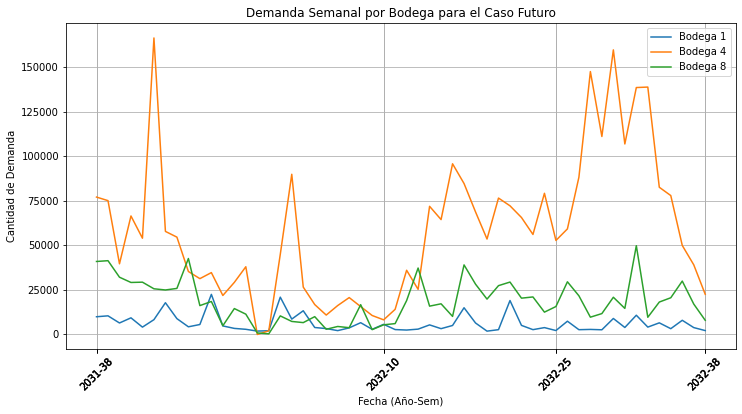

In [13]:
# Supongamos que tienes un DataFrame llamado 'df' con la estructura proporcionada
df = df_futuro

# Crear un gráfico con líneas separadas para cada bodega
plt.figure(figsize=(12, 6))
for bodega, data in df.groupby('Bodega Asignada'):
    plt.plot(data['Año-Sem'], data['Cantidad'], label=f'Bodega {bodega}')

plt.xlabel('Fecha (Año-Sem)')
plt.ylabel('Cantidad de Demanda')
plt.title('Demanda Semanal por Bodega para el Caso Futuro')
plt.legend()

# Especifica las fechas que deseas mostrar en el eje x
fechas_mostradas = ["2031-38", "2032-10", "2032-25", "2032-38"]

# Filtra el DataFrame para mostrar solo las fechas especificadas
df_mostrado = df[df['Año-Sem'].isin(fechas_mostradas)]

# Establece las marcas (ticks) en el eje x
plt.xticks(df_mostrado['Año-Sem'], rotation=45)

plt.grid(True)
plt.show()

## **2. Determinación del Tamaño Óptimo**

In [25]:
tamaño_bodegas_actual = {1: 3049.36, 4: 11864.77, 8: 5129.39}
tamaño_bodegas_futuro = {1: 6161.22, 4: 58837.48, 8: 18544.39}

In [26]:
costo_tpte = 1200 # Costo por kilómetro recorrido por camión
costo_posicion = 36700 # Costo fijo de posición por producto en una bodega
distancias_Stgo_a = {1: 371.39, 4: 179.66, 8: 534.03}
distancias_Stgo_f = {1: 372.52, 4: 189.66, 8: 600.62}

In [136]:
def tasa_ocupacion (demanda, tamaño_bodegas, numero_bodega, delta):
    tamaño = tamaño_bodegas[numero_bodega]*delta
    bdd = demanda[demanda["Bodega Asignada"] == numero_bodega]
    suma = 0
    for i in range(len(bdd)):
        if bdd.iloc[i, 2] >= tamaño:
            suma += 1
        else:
            suma += bdd.iloc[i, 2] / tamaño
    promedio = suma / len(bdd)
    return promedio

In [137]:
def semanas_sobreocupacion(demanda, tamaño_bodegas, numero_bodega, delta):
    tamaño = tamaño_bodegas[numero_bodega]*delta
    bdd = demanda[demanda["Bodega Asignada"] == numero_bodega]
    suma = 0
    camiones_a_pedir = 0
    for i in range(len(bdd)):
        if bdd.iloc[i, 2] > tamaño:
            suma += 1
        camiones_a_pedir += math.ceil(bdd.iloc[i,2]/tamaño)
    porcentaje = round(suma/len(bdd) * 100, 1)
    return suma, f"{porcentaje}%", camiones_a_pedir


In [138]:
def analisis_tamaño(demanda, tamaño_bodegas, numero_bodega, deltas, distancias):
    resultados = []
    for delta in deltas:
        tamaño = tamaño_bodegas[numero_bodega]*delta
        tasa = tasa_ocupacion(demanda, tamaño_bodegas, numero_bodega, delta)
        semanas, porcentaje, camiones = semanas_sobreocupacion(demanda, tamaño_bodegas, numero_bodega, delta)
        costo_fijo = 36700*tamaño/1000000
        costo_tpte = 1200*distancias[numero_bodega]*camiones/1000000
        costo_tpte = costo_tpte/6 # Solo para el Caso Actual
        costo_total = costo_fijo + costo_tpte
        resultados.append([delta, f"{round(tasa * 100, 2)}%", tamaño, (f'{semanas} semanas, {porcentaje} del total'), costo_fijo, costo_tpte, costo_total])
    df_resultados = pd.DataFrame(resultados, columns=["Delta", "Ocupación", "Tamaño", "Sobreocupación", "CF (MM)", "CTpte (MM)", "CT (MM)"])
    return df_resultados


Análisis para bodegas actuales:

In [150]:
delta_a1 = [0.1, 0.5, 0.75]
a1 = analisis_tamaño(df_actual, tamaño_bodegas_actual, 1, delta_a1, distancias_Stgo_a)
a1
#a1.drop('Delta', axis=1, inplace=True)
#tabla_latex = a1.to_latex(index=False)
#print(tabla_latex)

,Delta,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,0.10,99.02%,304.94,"295 semanas, 98.3% del total",11.19,234.35,245.54
1,0.50,89.59%,1524.68,"210 semanas, 70.0% del total",55.96,55.56,111.52
2,0.75,79.54%,2287.02,"154 semanas, 51.3% del total",83.93,41.15,125.08


In [158]:
delta_a4 = [0.09, 0.2, 0.36]
a4 = analisis_tamaño(df_actual, tamaño_bodegas_actual, 4, delta_a4, distancias_Stgo_a)
tabla_latex = a4.to_latex(index=False)
a4
#a4.drop('Delta', axis=1, inplace=True)
#tabla_latex = a4.to_latex(index=False)
#print(tabla_latex)

,Delta,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,0.09,99.52%,1067.83,"292 semanas, 97.7% del total",39.19,124.76,163.95
1,0.20,95.18%,2372.95,"249 semanas, 83.3% del total",87.09,58.86,145.94
2,0.36,85.25%,4271.32,"184 semanas, 61.5% del total",156.76,35.07,191.83


In [171]:
delta_a8 = [0.16, 0.4, 0.65]
a8 = analisis_tamaño(df_actual, tamaño_bodegas_actual, 8, delta_a8, distancias_Stgo_a)
tabla_latex = a8.to_latex(index=False)
a8
#a8.drop('Delta', axis=1, inplace=True)
#tabla_latex = a8.to_latex(index=False)
#print(tabla_latex)

,Delta,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,0.16,96.89%,820.70,"270 semanas, 90.0% del total",30.12,216.82,246.94
1,0.40,86.76%,2051.76,"212 semanas, 70.7% del total",75.30,97.09,172.39
2,0.65,76.55%,3334.10,"152 semanas, 50.7% del total",122.36,65.69,188.05


In [174]:
a1['Bodega'] = 'Bodega 1'
a4['Bodega'] = 'Bodega 4'
a8['Bodega'] = 'Bodega 8'
column_order = ['Bodega', 'Delta', 'Ocupación', 'Tamaño', 'Sobreocupación', 'CF (MM)', 'CTpte (MM)', 'CT (MM)']

df_analisis_tamaño = pd.concat([a1, a4, a8], ignore_index=True)
df_analisis_tamaño = df_analisis_tamaño.reindex(columns=column_order)
df_analisis_tamaño.drop('Delta', axis=1, inplace=True)
df_analisis_tamaño

#tabla_latex = df_analisis_tamaño.to_latex(index=False)
#print(tabla_latex)

,Bodega,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,Bodega 1,99.02%,304.94,"295 semanas, 98.3% del total",11.19,234.35,245.54
1,Bodega 1,89.59%,1524.68,"210 semanas, 70.0% del total",55.96,55.56,111.52
2,Bodega 1,79.54%,2287.02,"154 semanas, 51.3% del total",83.93,41.15,125.08
3,Bodega 4,99.52%,1067.83,"292 semanas, 97.7% del total",39.19,124.76,163.95
4,Bodega 4,95.18%,2372.95,"249 semanas, 83.3% del total",87.09,58.86,145.94
5,Bodega 4,85.25%,4271.32,"184 semanas, 61.5% del total",156.76,35.07,191.83
6,Bodega 8,96.89%,820.70,"270 semanas, 90.0% del total",30.12,216.82,246.94
7,Bodega 8,86.76%,2051.76,"212 semanas, 70.7% del total",75.30,97.09,172.39
8,Bodega 8,76.55%,3334.10,"152 semanas, 50.7% del total",122.36,65.69,188.05


Análisis para bodegas futuras:

In [59]:
delta_f1 = [0.27, 0.31, 0.56]
f1 = analisis_tamaño(df_futuro, tamaño_bodegas_futuro, 1, delta_f1, distancias_Stgo_f)
tabla_latex = f1.to_latex(index=False)
f1
#f1.drop('Delta', axis=1, inplace=True)
#tabla_latex = f1.to_latex(index=False)
#print(tabla_latex)

,Delta,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,0.27,100.0%,1663.53,"54 semanas, 100.0% del total",61.05,101.47,162.53
1,0.31,99.61%,1909.98,"52 semanas, 96.3% del total",70.10,89.85,159.95
2,0.56,89.65%,3450.28,"34 semanas, 63.0% del total",126.63,54.54,181.16


In [111]:
delta_f4 =  [0.031, 0.08, 0.51]
f4 = analisis_tamaño(df_futuro, tamaño_bodegas_futuro, 4, delta_f4, distancias_Stgo_f)
tabla_latex = f4.to_latex(index=False)
f4
#f4.drop('Delta', axis=1, inplace=True)
#tabla_latex = f4.to_latex(index=False)
#print(tabla_latex)

,Delta,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,0.03,97.97%,1823.96,"53 semanas, 98.1% del total",66.94,402.16,469.09
1,0.08,96.96%,4707.00,"52 semanas, 96.3% del total",172.75,159.77,332.52
2,0.51,86.94%,30007.11,"39 semanas, 72.2% del total",1101.26,29.59,1130.85


In [128]:
delta_f8 = [0.05, 0.23, 0.61]
f8 = analisis_tamaño(df_futuro, tamaño_bodegas_futuro, 8, delta_f8, distancias_Stgo_f)
tabla_latex = f8.to_latex(index=False)
f8
#f8.drop('Delta', axis=1, inplace=True)
#tabla_latex = f8.to_latex(index=False)
#print(tabla_latex)

,Delta,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,0.05,98.02%,927.22,"52 semanas, 96.3% del total",34.03,797.86,831.89
1,0.23,94.98%,4265.21,"49 semanas, 90.7% del total",156.53,185.95,342.49
2,0.61,84.95%,11312.08,"36 semanas, 66.7% del total",415.15,82.16,497.32


In [131]:
f1['Bodega'] = 'Bodega 1'
f4['Bodega'] = 'Bodega 4'
f8['Bodega'] = 'Bodega 8'   
column_order = ['Bodega', 'Delta', 'Ocupación', 'Tamaño', 'Sobreocupación', 'CF (MM)', 'CTpte (MM)', 'CT (MM)']

df_analisis_tamaño = pd.concat([f1, f4, f8], ignore_index=True)
df_analisis_tamaño = df_analisis_tamaño.reindex(columns=column_order)
df_analisis_tamaño.drop('Delta', axis=1, inplace=True)
df_analisis_tamaño

#tabla_latex = df_analisis_tamaño.to_latex(index=False)
#print(tabla_latex)

,Bodega,Ocupación,Tamaño,Sobreocupación,CF (MM),CTpte (MM),CT (MM)
0,Bodega 1,100.0%,1663.53,"54 semanas, 100.0% del total",61.05,101.47,162.53
1,Bodega 1,99.61%,1909.98,"52 semanas, 96.3% del total",70.10,89.85,159.95
2,Bodega 1,89.65%,3450.28,"34 semanas, 63.0% del total",126.63,54.54,181.16
3,Bodega 4,97.97%,1823.96,"53 semanas, 98.1% del total",66.94,402.16,469.09
4,Bodega 4,96.96%,4707.00,"52 semanas, 96.3% del total",172.75,159.77,332.52
5,Bodega 4,86.94%,30007.11,"39 semanas, 72.2% del total",1101.26,29.59,1130.85
6,Bodega 8,98.02%,927.22,"52 semanas, 96.3% del total",34.03,797.86,831.89
7,Bodega 8,94.98%,4265.21,"49 semanas, 90.7% del total",156.53,185.95,342.49
8,Bodega 8,84.95%,11312.08,"36 semanas, 66.7% del total",415.15,82.16,497.32
